In [1]:
# Import 
import os
import time
import json
import datetime
import numpy as np
import pandas as pd

from IPython.display import display

from pathlib import Path
from tyssue import config
from tyssue import Sheet#, SheetGeometry as geom
from tyssue.geometry.sheet_geometry import ClosedSheetGeometry as geom
from tyssue.io import hdf5
from tyssue.io.hdf5 import load_datasets
from tyssue.dynamics import SheetModel as basemodel
from tyssue.dynamics.apoptosis_model import SheetApoptosisModel as model
from tyssue.solvers.sheet_vertex_solver import Solver as solver
from tyssue.draw import sheet_view
from tyssue.draw.plt_draw import quick_edge_draw
from tyssue.draw.ipv_draw import sheet_view as ipv_draw 

from tyssue.behaviors.event_manager import EventManager
from tyssue.behaviors.sheet.apoptosis_events import apoptosis

import matplotlib.pyplot as plt
%matplotlib inline

try:
    import seaborn as sns
except ImportError:
    print('Seaborn not found')
import ipyvolume as ipv
ipv.clear()

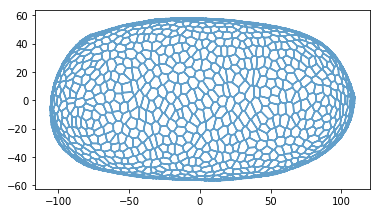

In [11]:
#SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190626_one_fold_clone')
#dirname = SIM_DIR/'1.08_constriction_30_radialtension_1.0_ratio0/'
SIM_DIR = Path('/home/admin-suz/Documents/Code/')
dirname = SIM_DIR/'test/'
from tyssue.draw import sheet_view


import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'movie_0.20.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)
sheet=sheet.extract_bounding_box(y_boundary=(-10,150))
fig, ax = quick_edge_draw(sheet, ['z', 'x'],
                              alpha=0.7)

In [43]:
with pd.HDFStore(current) as store:
    print(store)
    settings = store['settings']

<class 'pandas.io.pytables.HDFStore'>
File path: invagination_0011.hf5



KeyError: 'No object named settings in the file'

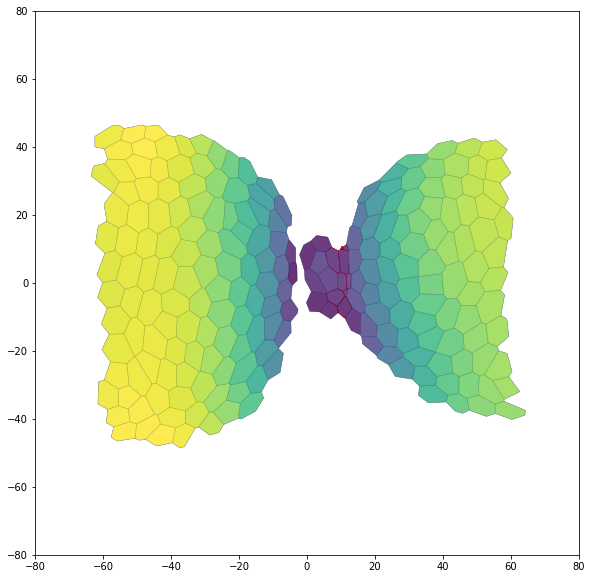

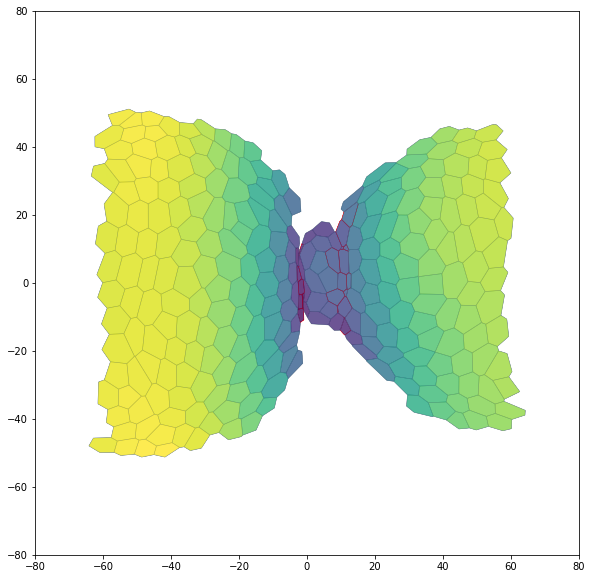

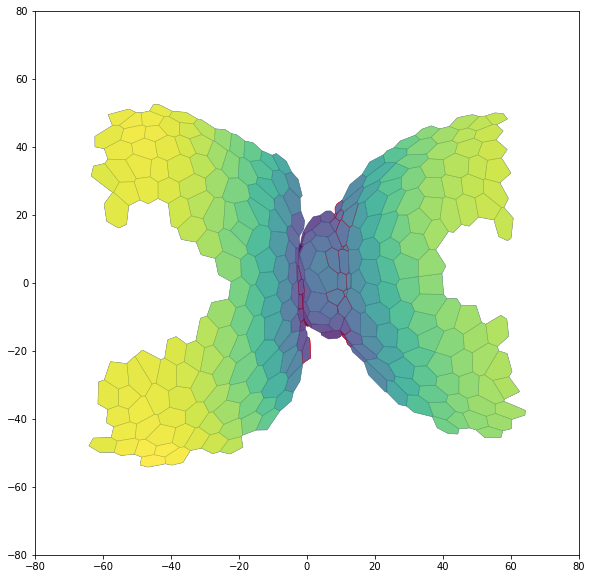

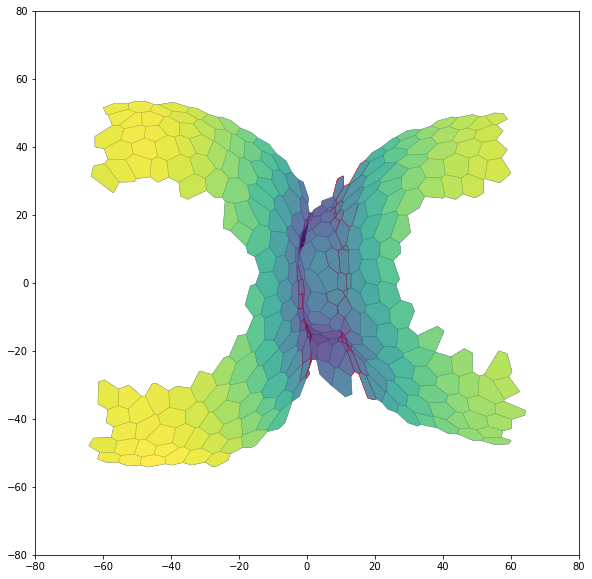

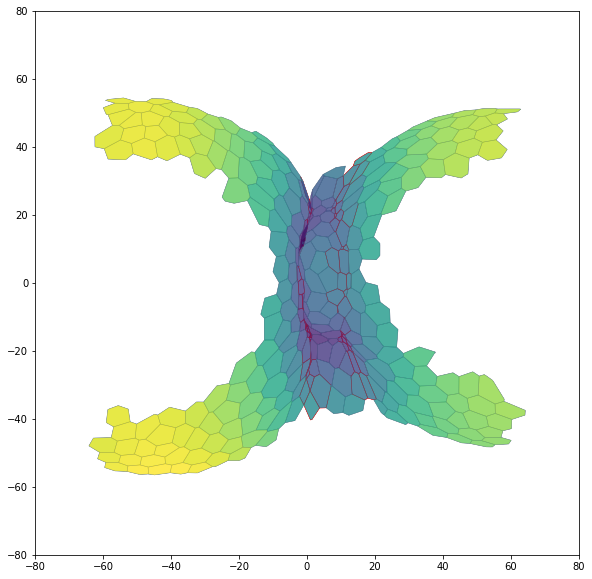

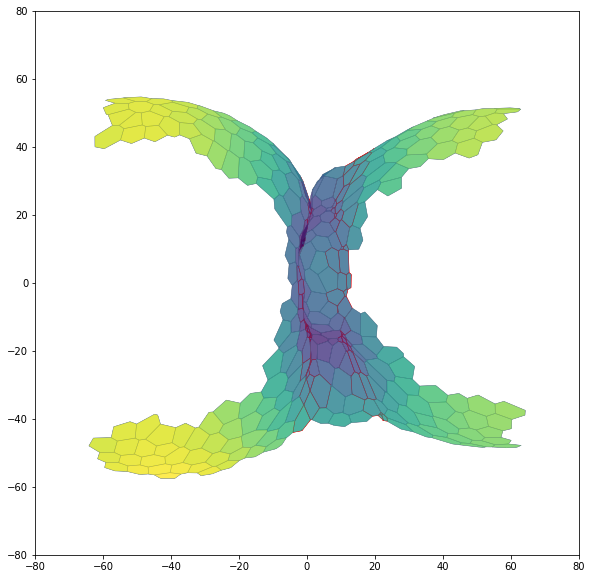

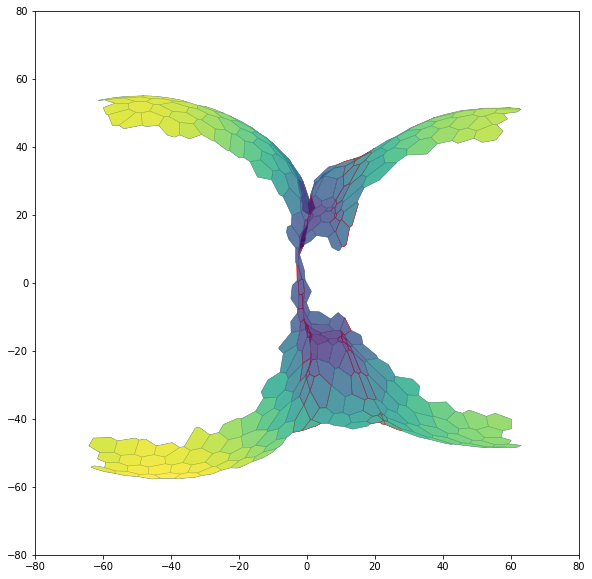

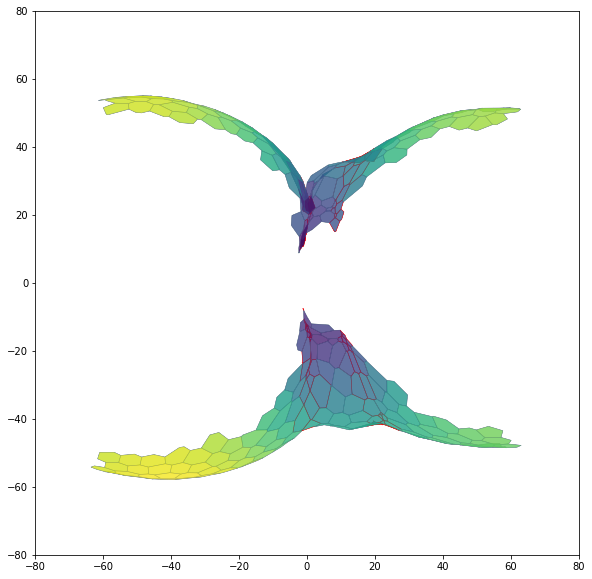

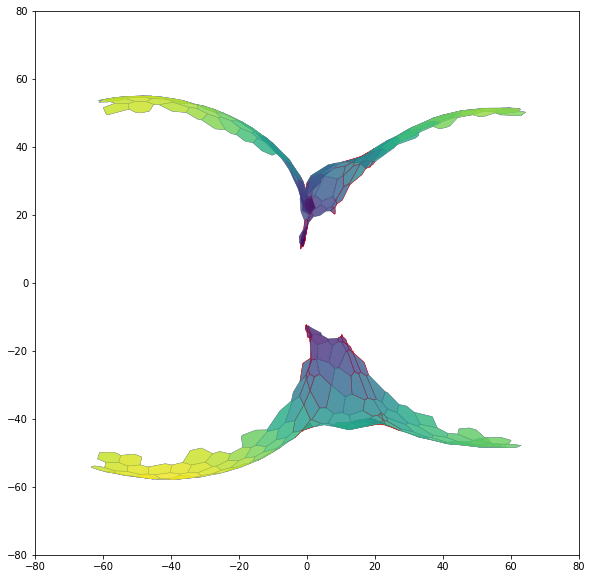

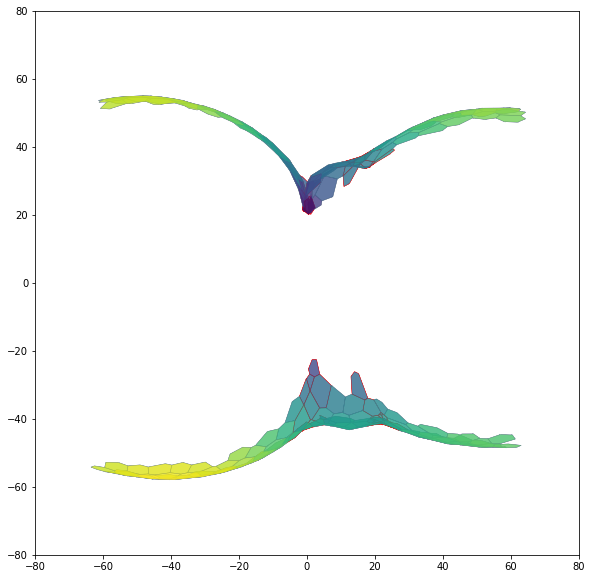

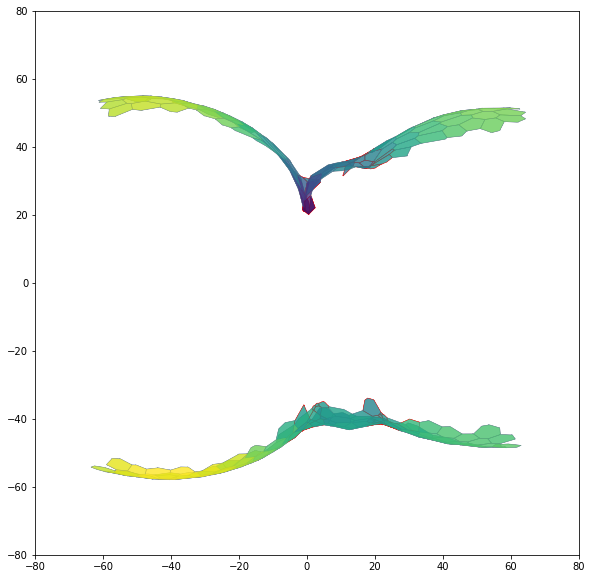

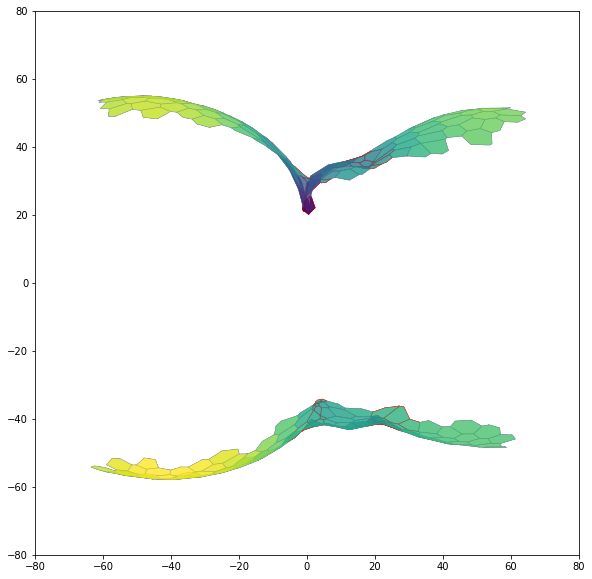

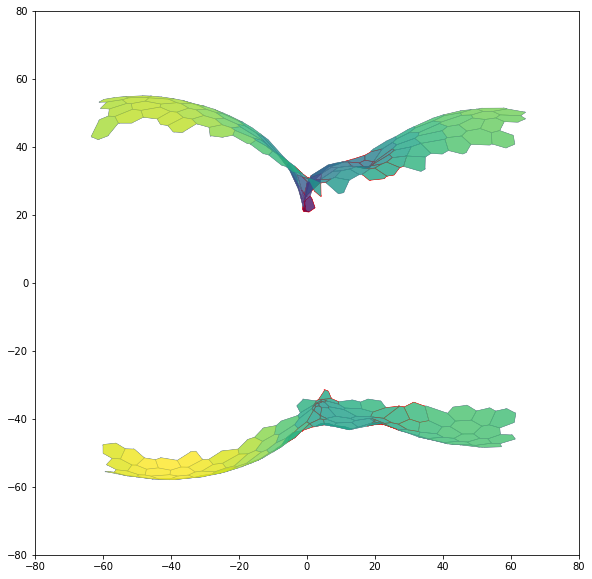

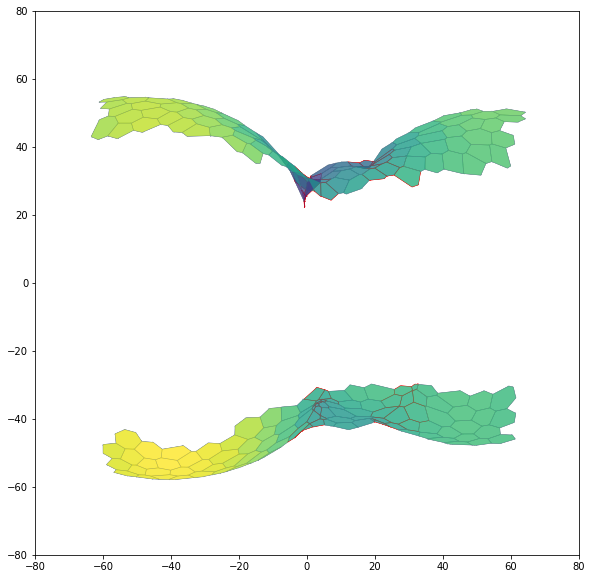

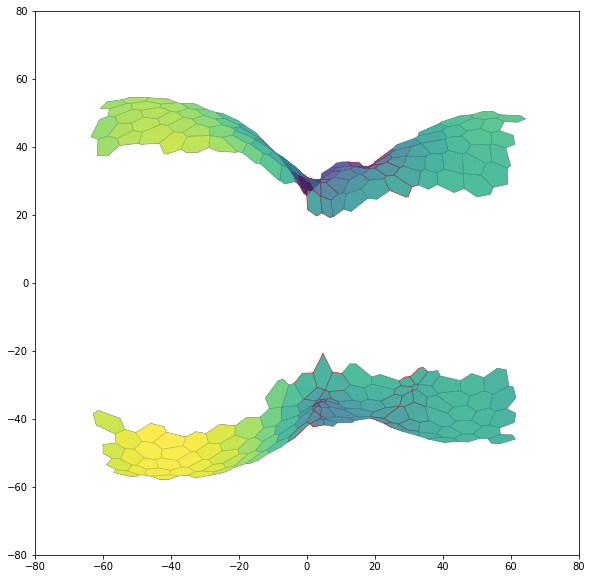

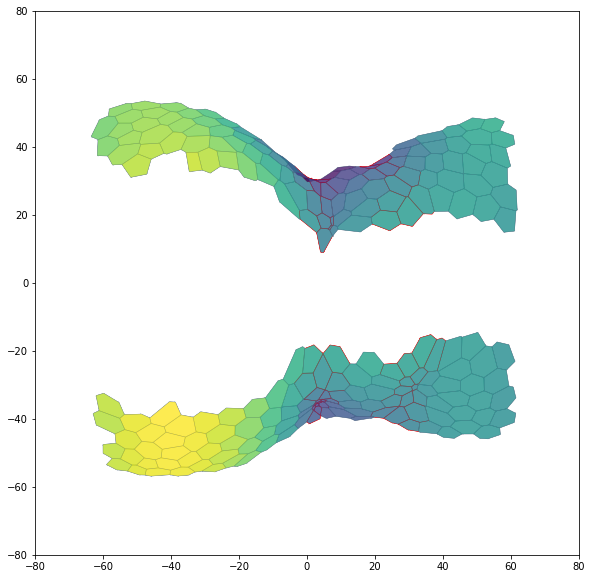

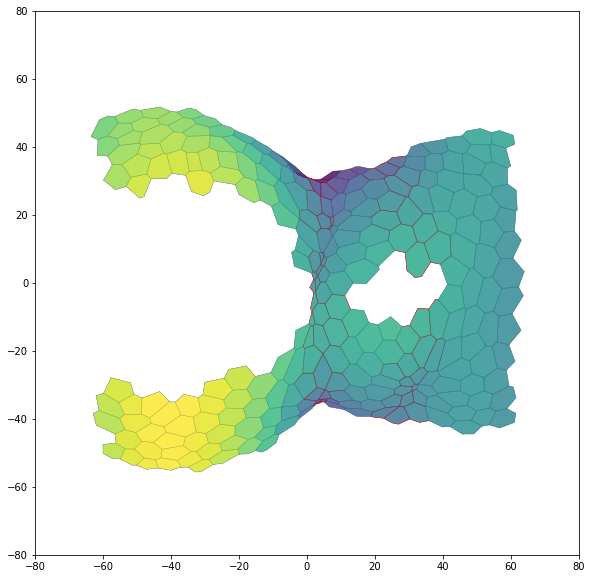

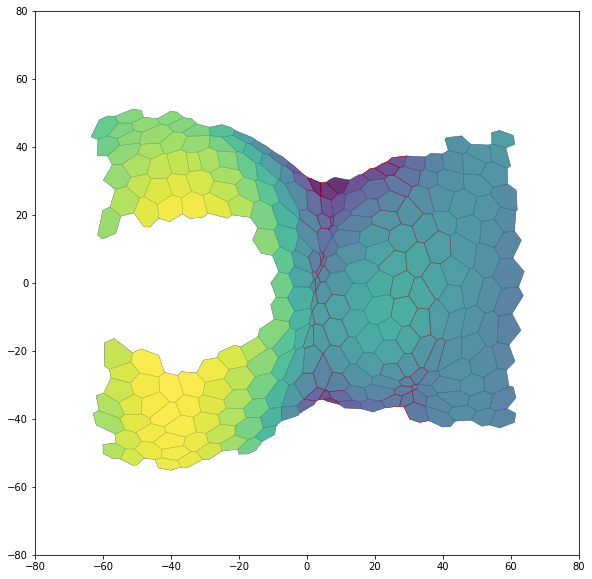

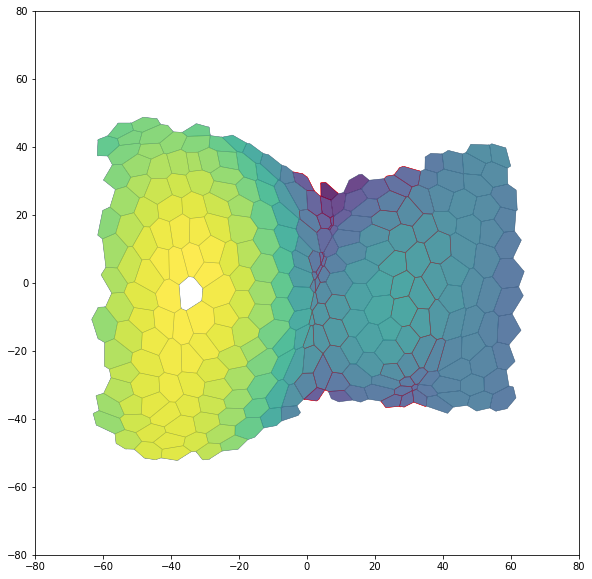

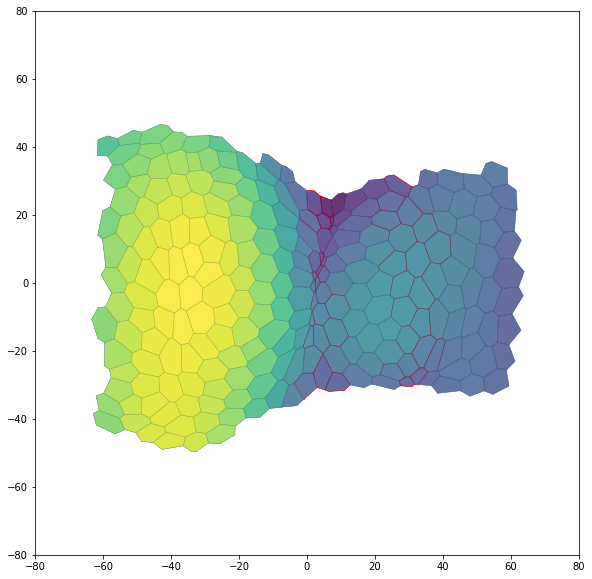

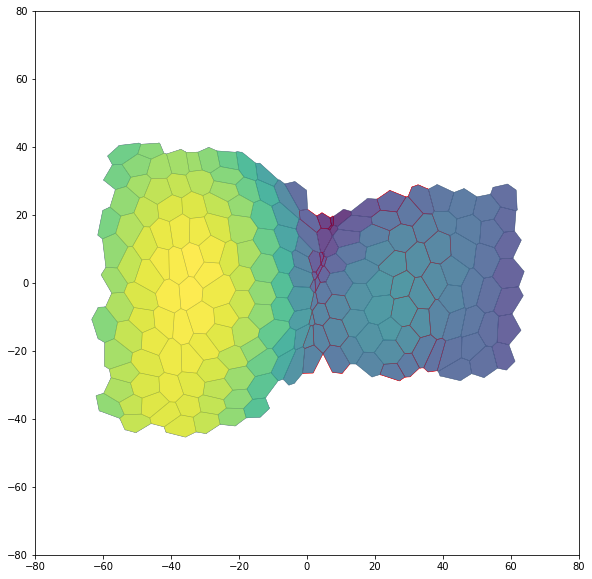

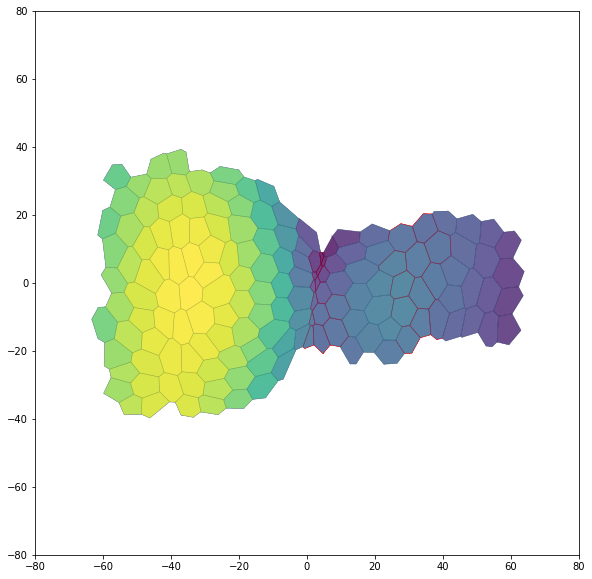

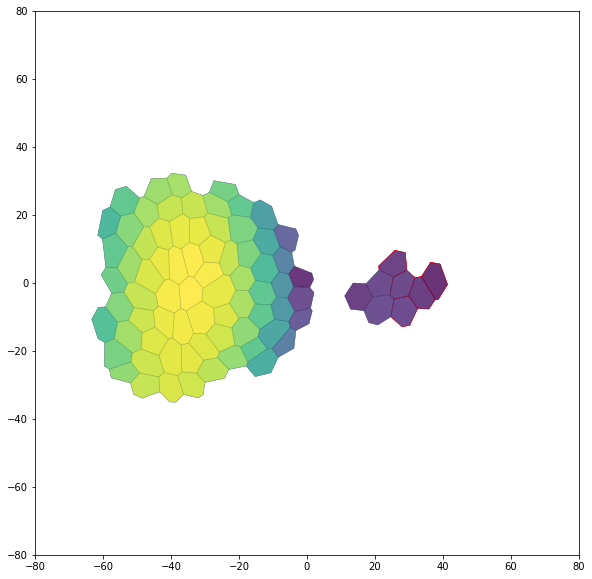

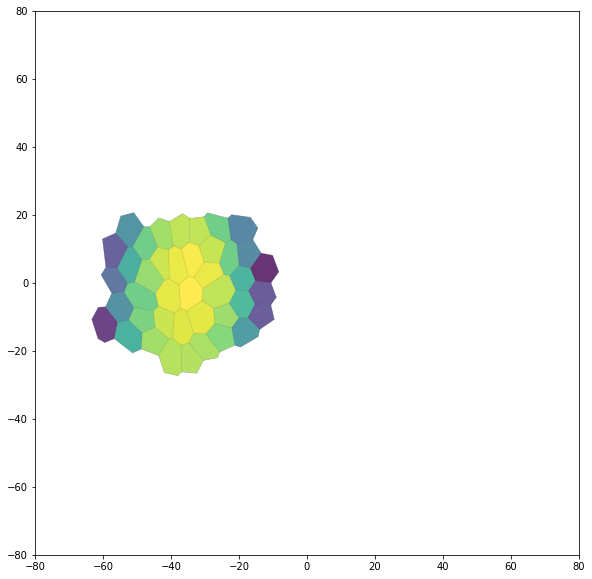

In [144]:
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190710_two_fold_4_neighbors')
dirname = SIM_DIR/'1.16_constriction_30_radialtension_1_ratio3'

from tyssue.draw import sheet_view
import matplotlib

import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0044.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)
"""sheet.face_df['test']=0
index =sheet.face_df[(sheet.face_df.z>6) & (sheet.face_df.z<15) 
              & (sheet.face_df.y>25) & (sheet.face_df.y<35) 
                    & (sheet.face_df.x>0)].index
sheet.face_df.loc[index, 'test']=1"""

#sheet = sheet.extract_bounding_box(z_boundary=[-200,50])

def draw_specs(sheet):
    sheet.edge_df['color']=0    
    sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.fold>0].index),'color']=1
    #sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.is_mesoderm>0].index),'color']=1
    cmap_edge = matplotlib.colors.ListedColormap(['lightslategrey', 'red'])
    
    specs = {
        'face': {
            'visible': True,
            #'color': np.sqrt((sheet.face_df.x)**2 + (sheet.face_df.y)**2),
            'color':np.sqrt(sheet.face_df.y**2+sheet.face_df.x**2), 
            'colormap': 'viridis',
            'alpha':0.8,
             },
        'edge': {
            'visible': True,
            #'color': np.sqrt((sheet.edge_df.sx)**2 + (sheet.edge_df.sy)**2),
            'color':sheet.edge_df.color,
            'color_range':(0,1),
            'colormap':cmap_edge,
            
       
        },
        'vert':{'visible':False}
        
    }
    return specs

cpt = 0
for i in range(-60,60,5):
    ipv.clear()
    sheet2=sheet.extract_bounding_box(z_boundary=[-60,60], x_boundary=(i,i+30))
    """ipv_fig, meshes = sheet_view(sheet, coords=list('zxy'),
                                 mode='3D', **draw_specs(sheet))
    ipv_fig"""
    fig, ax = sheet_view(sheet2, coords=['z', 'y'], 
                    **draw_specs(sheet2))
    ax.grid(False)
    ax.set_xlim(-80, 80)
    ax.set_ylim(-80, 80)
    fig.set_size_inches(20, 10, forward=True)
    #fig.show()
    fig.savefig('../movie/test'+str(cpt)+'.png')
    cpt = cpt+1

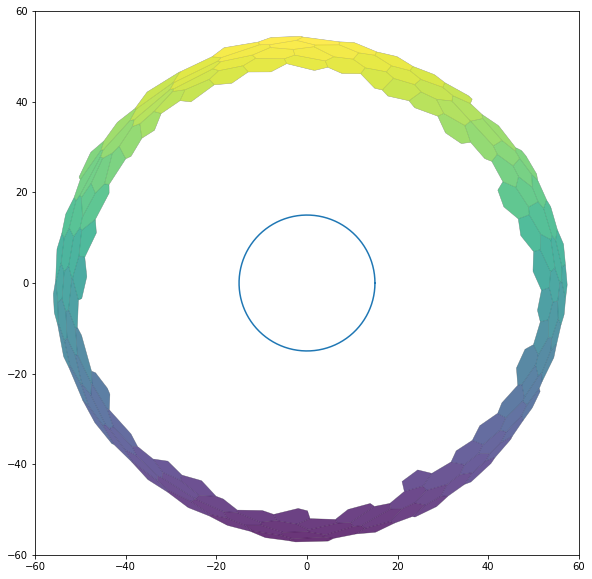

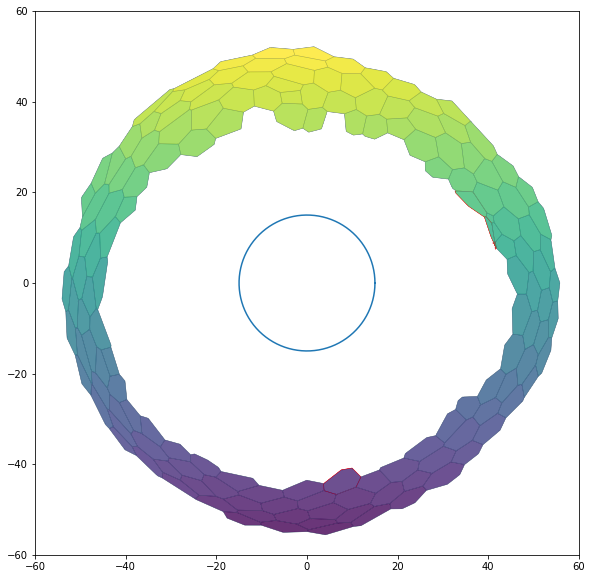

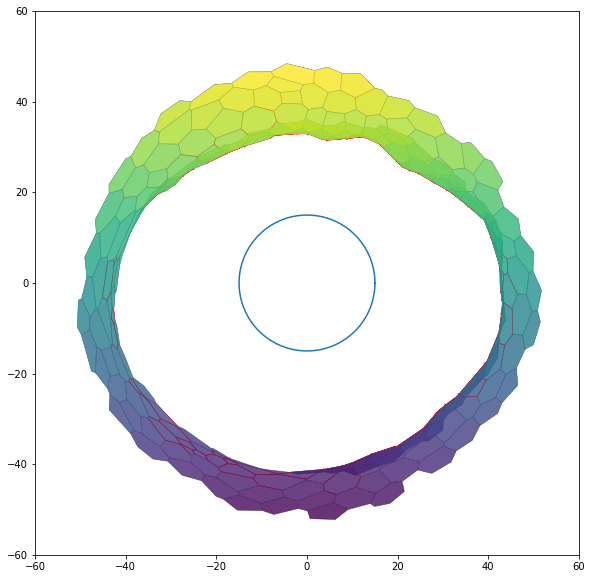

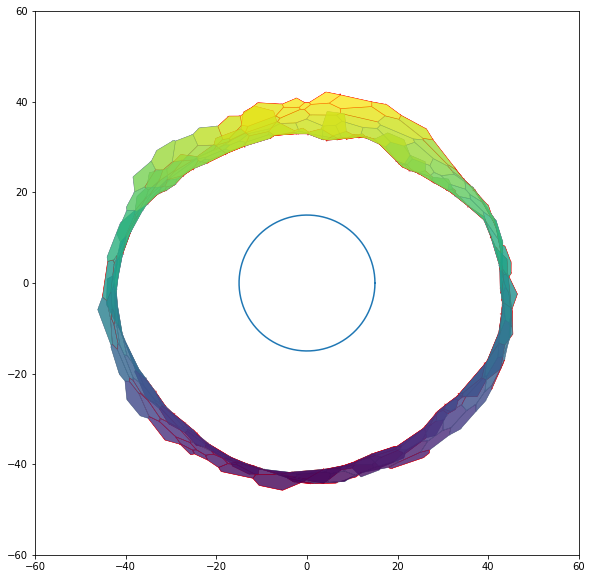

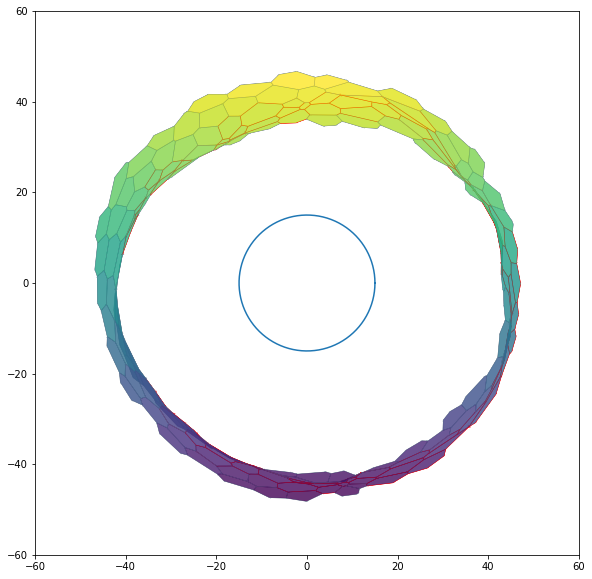

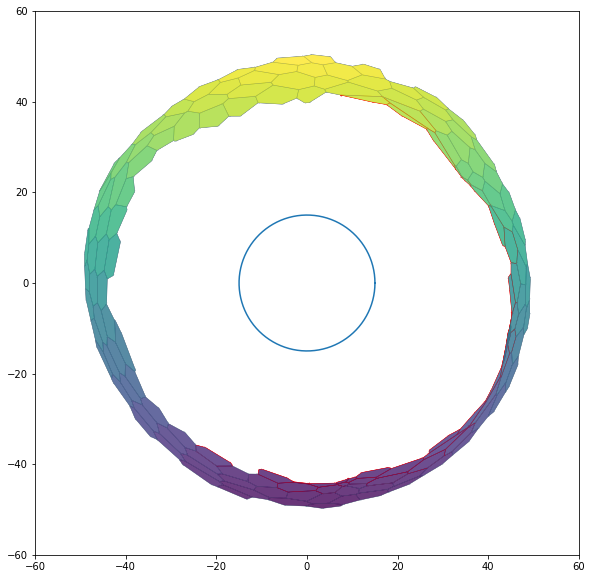

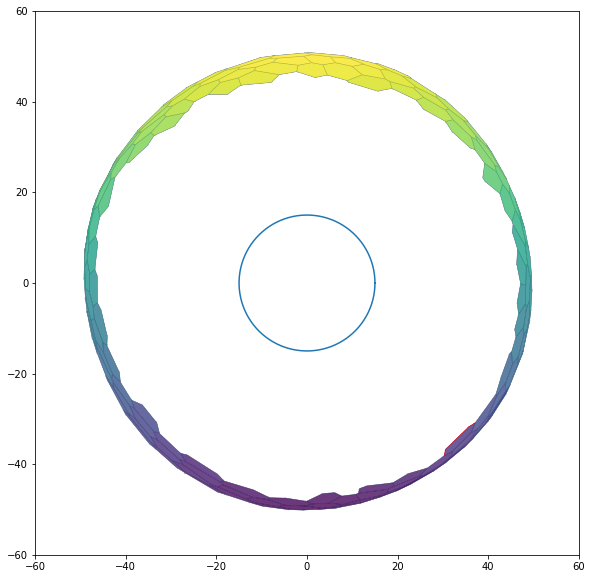

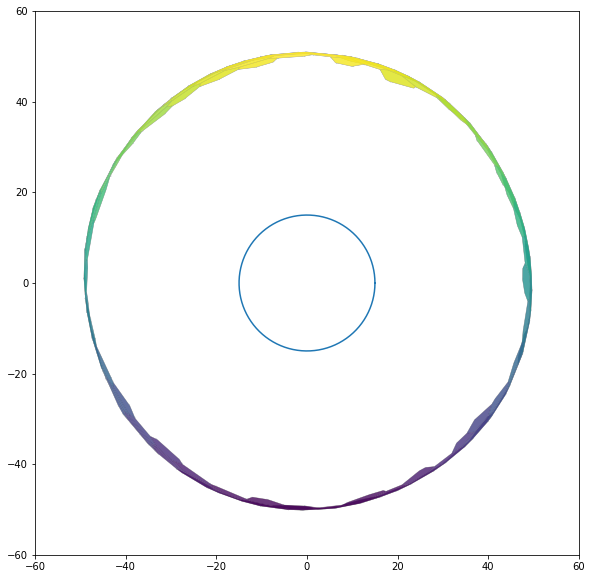

In [183]:
#SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190626_one_fold_clone')
#dirname = SIM_DIR/'1.08_constriction_30_radialtension_1.25_ratio0/'
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190708_two_fold')
dirname = SIM_DIR/'1.08_constriction_20_radialtension_1_ratio1/'
from tyssue.draw import sheet_view
import matplotlib

import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0061.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)
"""sheet.face_df['test']=0
index =sheet.face_df[(sheet.face_df.z>6) & (sheet.face_df.z<15) 
              & (sheet.face_df.y>25) & (sheet.face_df.y<35) 
                    & (sheet.face_df.x>0)].index
sheet.face_df.loc[index, 'test']=1"""

#sheet = sheet.extract_bounding_box(z_boundary=[-200,50])

def draw_specs(sheet):
    sheet.edge_df['color']=0    
    sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.fold>0].index),'color']=1
    #sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.is_mesoderm>0].index),'color']=1
    cmap_edge = matplotlib.colors.ListedColormap(['lightslategrey', 'red'])
    
    specs = {
        'face': {
            'visible': True,
            #'color': np.sqrt((sheet.face_df.x)**2 + (sheet.face_df.y)**2),
            'color':sheet.face_df.y, 
            'colormap': 'viridis',
            'alpha':0.8,
             },
        'edge': {
            'visible': True,
            #'color': np.sqrt((sheet.edge_df.sx)**2 + (sheet.edge_df.sy)**2),
            'color':sheet.edge_df.color,
            'color_range':(0,1),
            'colormap':cmap_edge,
            
       
        },
        'vert':{'visible':False}
        
    }
    return specs

cpt = 0
for i in range(-30,50,10):
    ipv.clear()
    sheet2=sheet.extract_bounding_box(z_boundary=[i,i+20], y_boundary=(-150,150))
    """ipv_fig, meshes = sheet_view(sheet, coords=list('zxy'),
                                 mode='3D', **draw_specs(sheet))
    ipv_fig"""
    fig, ax = sheet_view(sheet2, coords=['x', 'y'], 
                    **draw_specs(sheet2))
    ax.grid(False)
    fig.set_size_inches(20, 10, forward=True)
    #fig.show()
    
    theta = np.linspace(0, 2*np.pi, 100)
    x = np.cos(theta)*15
    y = np.sin(theta)*15
    ax.plot(x,y)
    ax.set_xlim(-60, 60)
    ax.set_ylim(-60, 60)
    fig.savefig('../movie/sagittal'+str(cpt)+'.png')
    cpt = cpt+1

In [7]:
from math import atan, asin
def get_morphometry(borders):

    centers = borders.groupby('label')[['x', 'y', 'z']].mean()
    centers.index = centers.index.astype(np.int)
    centers.index.name='label'

    aniso = borders.groupby('label').apply(_get_anisotropies)
    aniso.index = aniso.index.astype(np.int)
    aniso.index.name = 'label'
    centers = pd.concat([centers, aniso], axis=1)
    centers['orient'] = (np.pi/2 - centers['tilt'])*180/np.pi

    return centers


def _poly_area(relative_pos):
    rolled = np.roll(relative_pos, 1, axis=0)

    return (relative_pos[:, 1] * rolled[:, 0]
            - relative_pos[:, 0]* rolled[:, 1]).sum()/2


def _get_anisotropies(verts, coords=['x', 'y', 'z']):
    centered = (verts[coords].values -
                verts[coords].mean(axis=0).values[np.newaxis, :])
    u, s, v = np.linalg.svd(centered,
                            full_matrices=False,
                            compute_uv=True)

    tilt = np.abs(atan(v[1, 0]/v[0, 0]))
    ar = s[0]/s[1]
    aligned = centered @ v.T
    theta = np.arctan2(aligned[:, 1], aligned[:, 0])
    aligned = aligned[np.argsort(theta)]
    area = _poly_area(aligned)

    return pd.Series({'ar': ar, 'tilt': tilt, 'area': area})


def get_ar(sheet):
    borders = sheet.upcast_srce(sheet.vert_df[sheet.coords])
    borders['label'] = sheet.edge_df['face']

    centers = get_morphometry(borders)
    return centers

In [68]:

def depth_calculation(sheet, min_, max_):
    # Caculation of the radius
    sheet_fold = sheet.extract_bounding_box(z_boundary=(min_,max_))
    r = np.sqrt(np.abs(sheet_fold.face_df.x).mean()**2 + np.abs(sheet_fold.face_df.y).mean()**2)
    return r



#SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190712_one_fold_line_tension_homogene_increase_in_fold')
#dirname = SIM_DIR/'1.08_constriction_30_radialtension_15_linetension_4.0_increasefactor0'
SIM_DIR = Path('/home/admin-suz/Documents/Code/')
dirname = SIM_DIR/'test/'


hfs = [f  for f in os.listdir(dirname) if f.endswith('hf5')]
hfs.sort()
from tyssue.draw.ipv_draw import edge_mesh, face_mesh

def get_meshes(dirname, hdf_file):
    dsets = hdf5.load_datasets(os.path.join(dirname, hdf_file),
                               data_names=['vert', 'edge', 'face'])
        
    sheet = Sheet('ellipse', dsets)
    geom.update_all(sheet)
    sheet = sheet.extract_bounding_box( z_boundary=(-80,80))
    #x_boundary=(-50,150),

    sheet.face_df['is_pulling'] = 0
    pulling_vert = sheet.vert_df[sheet.vert_df.radial_tension>0]
    pulling_face = sheet.edge_df[sheet.edge_df.srce.isin(pulling_vert.index)].face
    pulling_face_unique = pulling_face.unique()

    pulling_face = list(pulling_face)

    for i in list(pulling_face_unique):
        if pulling_face.count(i)<3:
            while i in(pulling_face):
                pulling_face.remove(i)

    sheet.face_df.loc[pulling_face, 'is_pulling']=4

    
    import matplotlib
    cmap = matplotlib.colors.ListedColormap(['lightslategrey', 'moccasin', 'moccasin','magenta', 'magenta', 'magenta'])
    cmap = matplotlib.colors.ListedColormap(['lightslategrey', 'moccasin', 'pink','pink','pink', 'red'])
    #cmap = matplotlib.colors.ListedColormap(['black', 'red', ]) 
    


    faces = face_mesh(sheet, coords=['x', 'y', 'z'],
                     #color=sheet.face_df.fold+sheet.face_df.is_mesoderm,
                     color=sheet.face_df['is_pulling']+sheet.face_df['apoptosis'],
                     colormap=matplotlib.colors.ListedColormap(['lightslategrey', 'moccasin', 
                                                                'pink','pink','pink', 'red']),
                     #color=np.sqrt((sheet.face_df.x)**2 + (sheet.face_df.y)**2),
                     
                     #color = get_ar(sheet).ar,
                     #colormap = 'Blues',
                     #color_range=(0,3)
                     )
    
    #edges = edge_mesh(sheet, coords=['x', 'y', 'z'], color='grey')
    sheet.edge_df['color']=0    
    sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.fold>0].index),'color']=1
    #sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.is_mesoderm>0].index),'color']=1
    #sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.is_mesoderm>0].index),'color']=1
    cmap_edge = matplotlib.colors.ListedColormap(['white', 'deeppink'])

    edges = edge_mesh(sheet, coords=['x', 'y', 'z'],
                  color = sheet.edge_df.color,
                  color_range=(0,1),
                  colormap=cmap_edge)
    return faces, edges

from ipywidgets import interact

def browse_sheets(dirname, hfs):
    n = len(hfs)
    ipv.clear()
    fig = ipv.gcf()
    meshes = get_meshes(dirname, hfs[0])
    fig.meshes = fig.meshes + list(meshes)
    
    def view_sheet(i):
        fig.animation = 0
        faces, edges = get_meshes(dirname, hfs[i])
        print()
        fig.meshes[0].x = faces.x
        fig.meshes[0].y = faces.y
        fig.meshes[0].z = faces.z
        fig.meshes[0].color = faces.color
        fig.meshes[0].triangles = faces.triangles

        fig.meshes[1].x = edges.x
        fig.meshes[1].y = edges.y
        fig.meshes[1].z = edges.z
        fig.meshes[1].color = edges.color
        fig.meshes[1].lines = edges.lines

        lim_inf = sheet.vert_df[sheet.coords].min().min()
        lim_sup = sheet.vert_df[sheet.coords].max().max()
        ipv.xyzlim(lim_inf, lim_sup)
    ipv.show()
    interact(view_sheet, i=(0, n-1))

In [69]:
browse_sheets(dirname, hfs)

interactive(children=(IntSlider(value=55, description='i', max=110), Output()), _dom_classes=('widget-interact…

"cpt = 0\nfor i in range(-60,60,10):\n    ipv.clear()\n    sheet2=sheet.extract_bounding_box(z_boundary=[-60,60], y_boundary=(i,i+20))\n\n    fig, ax = sheet_view(sheet2, coords=['x', 'z'], \n                    **draw_specs(sheet2))\n    ax.grid(False)\n    fig.set_size_inches(20, 10, forward=True)\n    #fig.show()\n    fig.savefig('../movie/ctrl'+str(cpt)+'.png')\n    cpt = cpt+1"

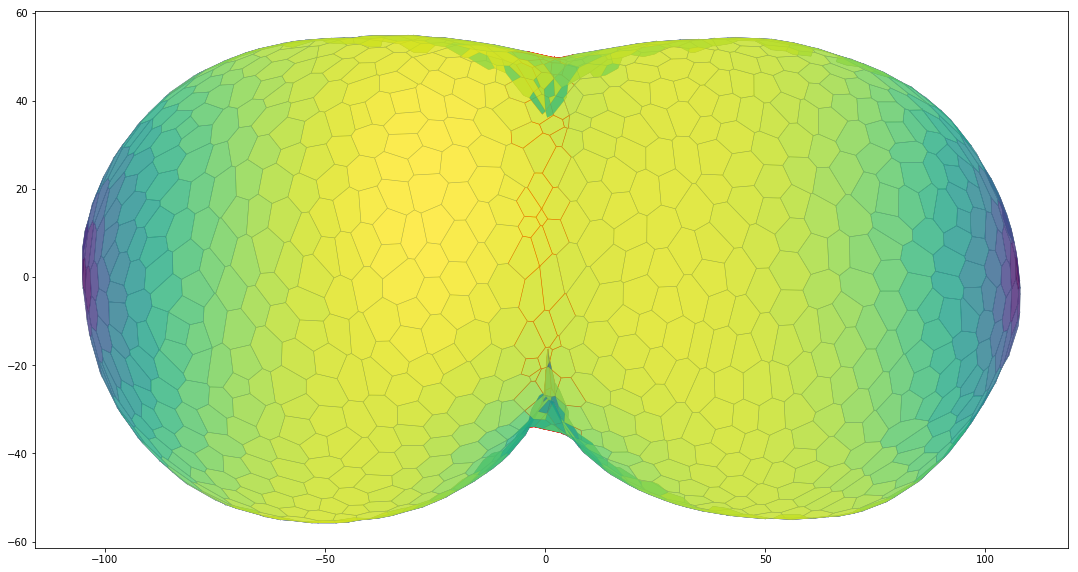

In [44]:
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190712_one_fold_line_tension_homogene_increase_in_fold')
dirname = SIM_DIR/'1.08_constriction_30_radialtension_15_linetension_4.0_increasefactor0'
from tyssue.draw import sheet_view
import matplotlib

import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0051.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)
sheet= sheet.extract_bounding_box(x_boundary=(-10,150))
"""sheet.face_df['test']=0
index =sheet.face_df[(sheet.face_df.z>6) & (sheet.face_df.z<15) 
              & (sheet.face_df.
              y>25) & (sheet.face_df.y<35) 
                    & (sheet.face_df.x>0)].index
sheet.face_df.loc[index, 'test']=1"""

#sheet = sheet.extract_bounding_box(z_boundary=[-200,50])

def draw_specs(sheet):
    sheet.edge_df['color']=0    
    sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.fold>0].index),'color']=1
    #sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.is_mesoderm>0].index),'color']=1
    #sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.is_mesoderm>0].index),'color']=1
    cmap_edge = matplotlib.colors.ListedColormap(['lightslategrey', 'red'])
    
    specs = {
        'face': {
            'visible': True,
            'color': np.sqrt((sheet.face_df.x)**2 + (sheet.face_df.y)**2),
            #'color':get_ar(sheet).ar, 
            'colormap': 'viridis',
            #'color_range':(0,3),
            'alpha':0.8,
             },
        'edge': {
            'visible': True,
            'color' : sheet.edge_df.color,
            #'color': np.sqrt((sheet.edge_df.sx)**2 + (sheet.edge_df.sy)**2),
            #'color':'black',
            #'color_range':(0,1),
            'colormap':cmap_edge,
            #'colormap':'viridis'
            
       
        },
        'vert':{'visible':False}
        
    }
    return specs

fig, ax = sheet_view(sheet, coords=['z', 'y'], 
                    **draw_specs(sheet))

fig.set_size_inches(18.5, 10.5, forward=True)
ax.grid(False)
#fig.savefig('../test_linear_tension.eps')

"""cpt = 0
for i in range(-60,60,10):
    ipv.clear()
    sheet2=sheet.extract_bounding_box(z_boundary=[-60,60], y_boundary=(i,i+20))

    fig, ax = sheet_view(sheet2, coords=['x', 'z'], 
                    **draw_specs(sheet2))
    ax.grid(False)
    fig.set_size_inches(20, 10, forward=True)
    #fig.show()
    fig.savefig('../movie/ctrl'+str(cpt)+'.png')
    cpt = cpt+1"""

Text(0,0.5,'nb apopto cells')

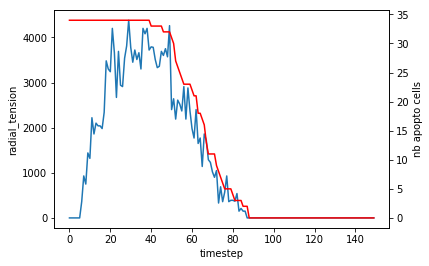

In [12]:
def open_sheet(dirname, t, data_names=['vert', 'edge', 'face', 'cell']):
    """Open hdf5 file

    Open HDF5 file correspond to t time from dirname directory.

    Parameters
    ----------
    directory : str
        complete directory path
    t : int
        time step
    """
    file_name = 'invagination_{:04d}.hf5'.format(t)
    dsets = hdf5.load_datasets(os.path.join(dirname, file_name),
                               data_names=data_names)

    specs = config.geometry.cylindrical_sheet()
    sheet = Sheet('ellipse', dsets, specs)
    return sheet


sheet = open_sheet(dirname,0)

force = []
nb_apopto_cells= []
for t in range(0, 200):
    try:
        sheet = open_sheet(dirname,t)
        force.append(sheet.vert_df.radial_tension.sum())
        nb_apopto_cells.append(len(sheet.face_df[sheet.face_df.apoptosis>0]))
    except Exception:
        pass

fig, ax = plt.subplots(1, 1)
ax.plot(force)
ax.set_xlabel('timestep')
ax.set_ylabel('radial_tension')
ax2 = ax.twinx() 
ax2.plot(nb_apopto_cells, color='red')
ax2.set_ylabel('nb apopto cells')

Text(0,0.5,'normalised radius')

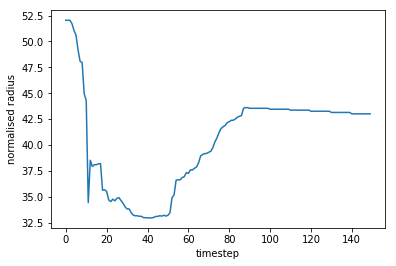

In [13]:
sheet = open_sheet(dirname,0)
depth_0 = depth_calculation(sheet, -7, 7)

depths = []
for t in range(0, 200):
    try:
        sheet = open_sheet(dirname,t)
        depths.append((depth_calculation(sheet, -7, 7)))
    except Exception:
        pass

time = depths.index(max(depths))

fig, ax = plt.subplots(1, 1)
ax.plot(depths)
ax.set_xlabel('timestep')
ax.set_ylabel('normalised radius')

In [183]:
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190708_two_fold')
dirname = SIM_DIR/'1.08_constriction_30_radialtension_1_ratio0/'
from tyssue.draw import sheet_view

current = 'invagination_0005.hf5'

dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)

from tyssue.dynamics import units, effectors, model_factory
from polarity.dynamics import RadialTension
model = model_factory(
    [
        RadialTension,
        effectors.FaceContractility,
        effectors.FaceAreaElasticity,
        effectors.LumenVolumeElasticity,
    ], effectors.FaceAreaElasticity)


def get_face_normal_forces(organo, model):
    gradient = model.compute_gradient(organo)

    edge_forces = organo.upcast_srce(gradient)
    #unit_normals = 2*organo.edge_df[['nx', 'ny', 'nz']]/organo.edge_df["sub_area"].values[:, np.newaxis]
    unit_normals = organo.edge_df[['nx', 'ny', 'nz']].values/organo.edge_df["sub_area"].values[:, np.newaxis]
    
    normal_force = - (unit_normals * edge_forces.values).sum(axis=1) #produit scalaire -> c'est la projection
    normal_force = organo.sum_face(normal_force)
    normal_force = normal_force.values.reshape(organo.Nf)
    return normal_force

sheet.settings['lumen_vol_elasticity'] = 3.e-6
sheet.settings['lumen_vol']= 1640039.362481827
sheet.settings['lumen_prefered_vol']= 1655117.8783696312

normal_force = get_face_normal_forces(sheet, model)
draw_specs = {
    "face": {
        "visible": True,
        "color": normal_force,
        "color_range": [-np.percentile(normal_force, 0.8),
                        np.percentile(normal_force, 0.8)],
        "colormap": "coolwarm"
    },
}

ipv.clear()
fig, mesh = sheet_view(sheet, mode='3D', **draw_specs)
fig

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0…

In [184]:
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190618')
dirname = SIM_DIR/'1.08_constriction_50_radialtension0_line_tension0/'
from tyssue.draw import sheet_view

import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0006.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)

print('0 -> ',sheet.vert_df.loc[sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.apoptosis==0].index)].srce].radial_tension.unique())
print('1 -> ',sheet.vert_df.loc[sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.apoptosis==1].index)].srce].radial_tension.unique())
print('2 -> ',sheet.vert_df.loc[sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.apoptosis==2].index)].srce].radial_tension.unique())
print('3 -> ',sheet.vert_df.loc[sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.apoptosis==3].index)].srce].radial_tension.unique())

FileNotFoundError: [Errno 2] No such file or directory: '/home/admin-suz/Documents/Simulations/test_apoptosis_20190618/1.08_constriction_50_radialtension0_line_tension0'

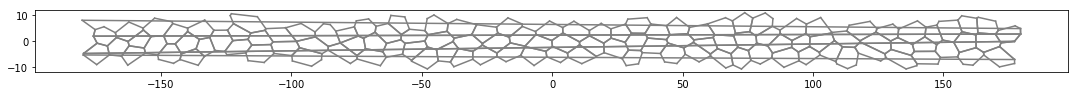

In [104]:
# in plane
from math import atan2
from matplotlib.patches import Polygon, FancyArrow, Arc, PathPatch
from matplotlib.collections import PatchCollection, PolyCollection

from tyssue.draw.plt_draw import parse_edge_specs, parse_face_specs
fig = plt.figure()
ax = plt.axes()



cmap = matplotlib.colors.ListedColormap(['white', 'magenta', 'magenta', 'magenta'])#, 'moccasin'])

theta = [atan2(sheet.vert_df.y[i], sheet.vert_df.x[i]) for i in range(0, sheet.Nv)]
#(z, rho*theta)

l_z=[]
l_rt=[]
for idx, edge in sheet.edge_df.iterrows():
    srce = int(edge["srce"])
    trgt = int(edge["trgt"])
    l_z.append(sheet.vert_df.loc[srce, 'z'])
    l_rt.append(sheet.vert_df.loc[srce, 'rho']*atan2(sheet.vert_df.loc[srce, 'y'], sheet.vert_df.loc[srce, 'x']))
    l_z.append(sheet.vert_df.loc[trgt, 'z'])
    l_rt.append(sheet.vert_df.loc[trgt, 'rho']*atan2(sheet.vert_df.loc[trgt, 'y'], sheet.vert_df.loc[trgt, 'x']))


plt.plot(l_rt[0:2],l_z[0:2], 'gray')
for i in range(0,len(l_z),2):
    plt.plot(l_rt[i:i+2],l_z[i:i+2],'gray')
   
    

ax.autoscale()
ax.set_aspect("equal")
fig.set_size_inches(18.5, 10.5, forward=True)

plt.savefig('../test.eps')

"cpt = 0\nfor i in range(-60,60,10):\n    ipv.clear()\n    sheet2=sheet.extract_bounding_box(z_boundary=[-60,60], y_boundary=(i,i+20))\n\n    fig, ax = sheet_view(sheet2, coords=['x', 'z'], \n                    **draw_specs(sheet2))\n    ax.grid(False)\n    fig.set_size_inches(20, 10, forward=True)\n    #fig.show()\n    fig.savefig('../movie/ctrl'+str(cpt)+'.png')\n    cpt = cpt+1"

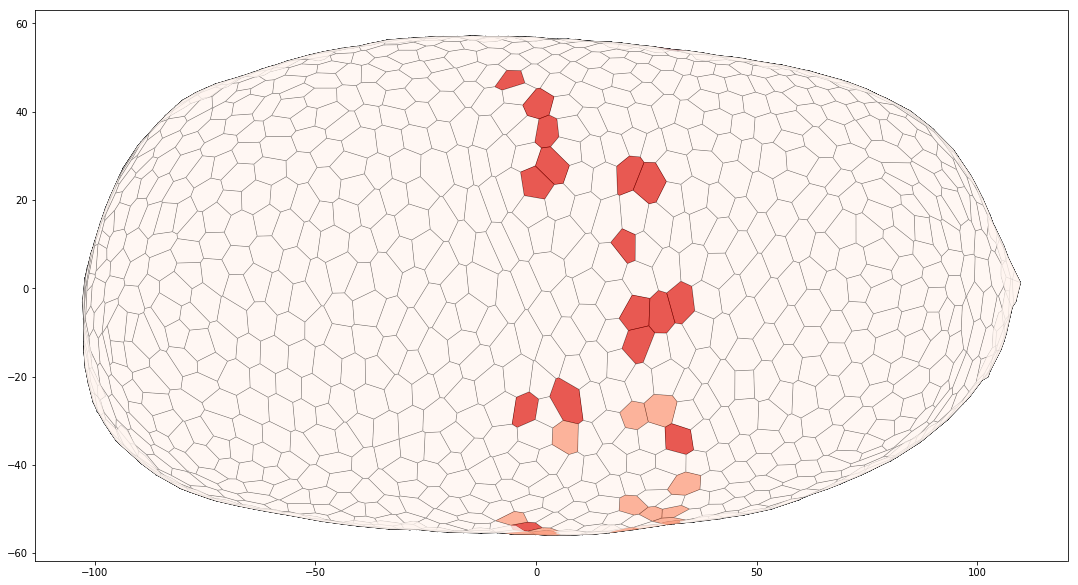

In [224]:
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test_apoptosis_20190710_two_fold_4_neighbors')
dirname = SIM_DIR/'1.08_constriction_30_radialtension_1_ratio1/'
from tyssue.draw import sheet_view
import matplotlib

import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0001.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)
sheet= sheet.extract_bounding_box(y_boundary=(-150,10))
"""sheet.face_df['test']=0
index =sheet.face_df[(sheet.face_df.z>6) & (sheet.face_df.z<15) 
              & (sheet.face_df.y>25) & (sheet.face_df.y<35) 
                    & (sheet.face_df.x>0)].index
sheet.face_df.loc[index, 'test']=1"""

#sheet = sheet.extract_bounding_box(z_boundary=[-200,50])

def draw_specs(sheet):
    sheet.edge_df['color']=0    
    sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.fold>0].index),'color']=1
    #sheet.edge_df.loc[sheet.edge_df.face.isin(sheet.face_df[sheet.face_df.is_mesoderm>0].index),'color']=1
    cmap_edge = matplotlib.colors.ListedColormap(['lightslategrey', 'red', 'magenta'])
    
    specs = {
        'face': {
            'visible': True,
            #'color': np.sqrt((sheet.face_df.x)**2 + (sheet.face_df.y)**2),
            'color':sheet.face_df.apoptosis, 
            'colormap': 'Reds',
            'alpha':0.8,
             },
        'edge': {
            'visible': True,
            #'color': np.sqrt((sheet.edge_df.sx)**2 + (sheet.edge_df.sy)**2),
            'color':'black',
            #'color_range':(0,1),
            #'colormap':cmap_edge,
            
       
        },
        'vert':{'visible':False}
        
    }
    return specs

fig, ax = sheet_view(sheet, coords=['z', 'x'], 
                    **draw_specs(sheet))

fig.set_size_inches(18.5, 10.5, forward=True)
ax.grid(False)
#fig.savefig('../twofold_t61.eps')

"""cpt = 0
for i in range(-60,60,10):
    ipv.clear()
    sheet2=sheet.extract_bounding_box(z_boundary=[-60,60], y_boundary=(i,i+20))

    fig, ax = sheet_view(sheet2, coords=['x', 'z'], 
                    **draw_specs(sheet2))
    ax.grid(False)
    fig.set_size_inches(20, 10, forward=True)
    #fig.show()
    fig.savefig('../movie/ctrl'+str(cpt)+'.png')
    cpt = cpt+1"""